# Query the index of a location within the 3D grid

### This functionality has been used widely throughout the program 
**Old version**
- Input: a location formed by x,y,z coordinates
- Output: the index of the location within the 3D grid
**Method**:
1. Calculate the distance between the given location and all the locations in the grid. 
2. Find the location with the smallest distance to the given location.
3. Return the index of the location with the smallest distance to the given location.

**New version**
- Input: a location formed by x,y,z coordinates
- Output: the index of the location within the 3D grid
**Method**:
1. Construct the KDTree of the 3D grid.
2. Query the index of the given location within the KDTree.

**Reasons for the change**
- The old version is slow because it has to calculate the distance between the given location and all the locations in the grid.
- The new version is faster because it uses KDTree to query the index of the given location.




In [1]:
import numpy as np
from scipy.spatial import KDTree
from scipy.spatial.distance import cdist
from pykdtree.kdtree import KDTree as KDTree_pykdtree
import timeit
import matplotlib.pyplot as plt
import time

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
n = 100
xv = np.linspace(0, 1, n)
yv = np.linspace(0, 1, n)
zv = np.linspace(0, 1, n)
xx, yy, zz = np.meshgrid(xv, yv, zv)
xx = xx.flatten()
yy = yy.flatten()
zz = zz.flatten()
grid = np.vstack((xx, yy, zz)).T

query_points = np.random.rand(1000, 3)

tree = KDTree(grid)
tree_pykdtree = KDTree_pykdtree(grid)
def get_ind_from_locations(loc: np.ndarray) -> np.ndarray:
    """
    Get the indices of the closest grid point to the given locations.
    """
    # Get the distances and indices of the closest grid point to the given locations
    dist = cdist(loc, grid)
    ind = np.argmin(dist, axis=1)
    return ind

In [9]:
# Method 1: KDTree from scipy
%timeit tree.query(query_points, k=1)

dist1, ind1 = tree.query(query_points, k=1)

1.79 ms ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
# Method 2: KDTree from pykdtree
%timeit tree_pykdtree.query(query_points, k=1)
dist2, ind2 = tree_pykdtree.query(query_points, k=1)

503 µs ± 30 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
# Method 3: get distance and indices from cdist
t1 = time.time()
ind3 = get_ind_from_locations(query_points)
t2 = time.time()
print(f"Time: {t2-t1}")

Time: 4.143543004989624


# Check the distance between locations that are the same as the original grid. 

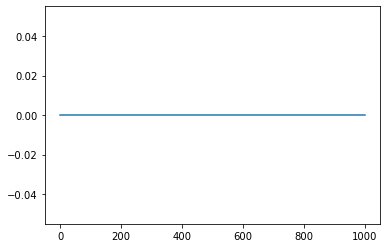

In [6]:
ind_random = np.random.randint(0, grid.shape[0], size=1000)
query_points = grid[ind_random, :]

distance, ind_min = tree_pykdtree.query(query_points, k=1)

# plt.figure(figsize=(10, 10))
# plt.plot(grid[:, 0], grid[:, 1], 'k.')
# plt.plot(query_points[:, 0], query_points[:, 1], 'r*')
# plt.plot(grid[ind_min, 0], grid[ind_min, 1], 'b+')
# plt.show()
plt.plot(distance)
plt.show()